In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = "C:\\Users\\alexa\\OneDrive\\Escritorio\\IRONHACK\\Test\\Melbourne_housing_FULL.csv"
df = pd.read_csv(url)
pd.set_option("display.max_columns", None)
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [3]:
df.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Question 1

In [4]:
initial_count = len(df)

df_clean = df.dropna(subset=['price'])
df_clean['price'] = df_clean['price'].astype(int)

final_count = len(df_clean)

percentage_lost = ((initial_count - final_count) / initial_count) * 100
percentage_lost

C:\Users\alexa\AppData\Local\Temp\ipykernel_29928\2411216802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].astype(int)


21.83205668875692

## Question 2

In [5]:
most_common_type = df['type'].value_counts().idxmax()
percentage_common_type = (df['type'].value_counts(normalize=True).max()) * 100

most_common_type, percentage_common_type

('h', 68.79536391542588)

## Question 3

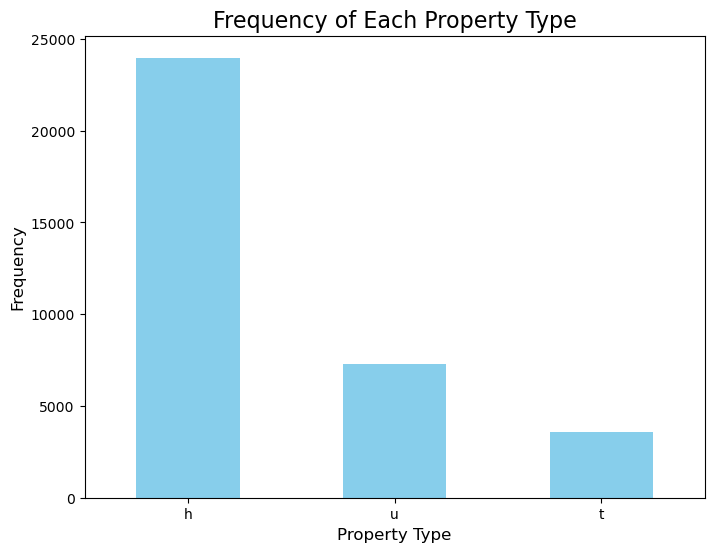

In [6]:
property_counts = df['type'].value_counts()

plt.figure(figsize=(8,6))
property_counts.plot(kind='bar', color='skyblue')

plt.title('Frequency of Each Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)

plt.show()

## Question 4

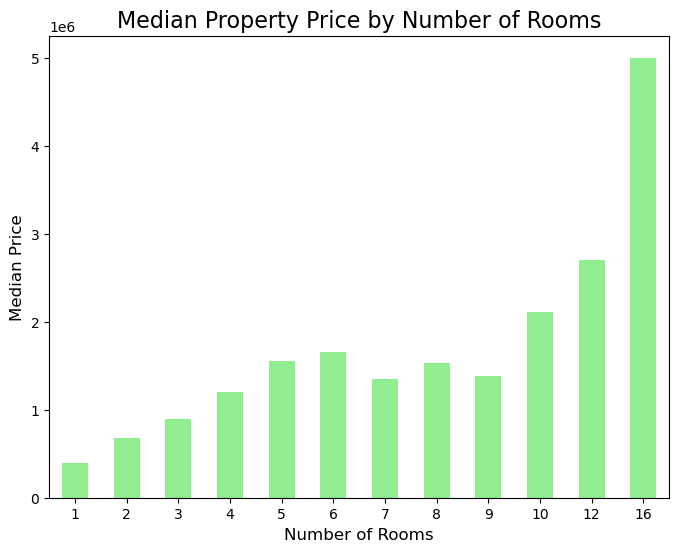

In [7]:
df_filtered = df.dropna(subset=['price', 'rooms'])

median_price_by_rooms = df_filtered.groupby('rooms')['price'].median()

plt.figure(figsize=(8,6))
median_price_by_rooms.plot(kind='bar', color='lightgreen')

plt.title('Median Property Price by Number of Rooms', fontsize=16)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Median Price', fontsize=12)
plt.xticks(rotation=0)

plt.show()

## Question 5

In [8]:
spearman_corr, p_value = stats.spearmanr(df_filtered['price'], df_filtered['rooms'])

spearman_corr

0.5042971590926004

## Question 6

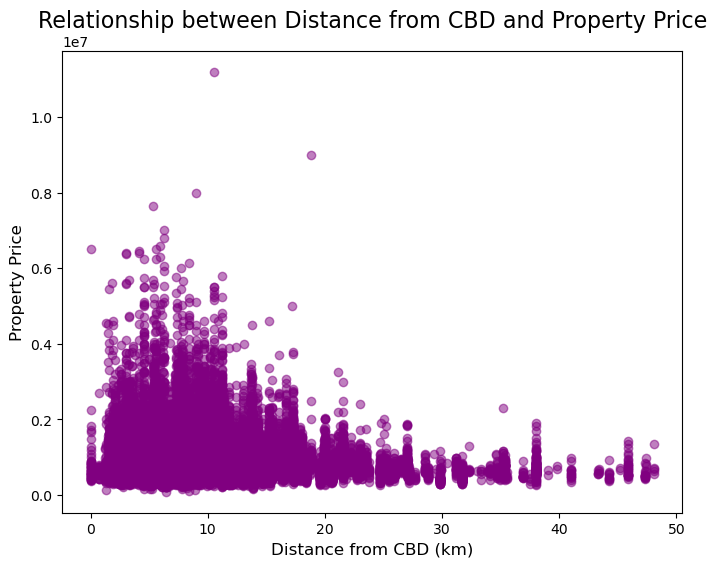

-0.18809341092744206

In [9]:
df_filtered = df.dropna(subset=['price', 'distance'])

plt.figure(figsize=(8,6))
plt.scatter(df_filtered['distance'], df_filtered['price'], color='purple', alpha=0.5)

plt.title('Relationship between Distance from CBD and Property Price', fontsize=16)
plt.xlabel('Distance from CBD (km)', fontsize=12)
plt.ylabel('Property Price', fontsize=12)

plt.show()

pearson_corr, p_value = stats.spearmanr(df_filtered['price'], df_filtered['distance'])
pearson_corr

## Question 7

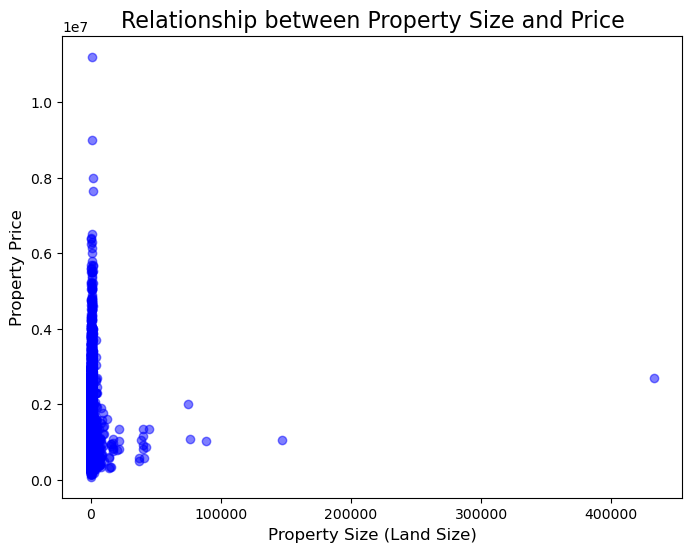

0.03274836524947047

In [10]:
df_filtered = df.dropna(subset=['price', 'landsize'])

plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['landsize'], df_filtered['price'], color='blue', alpha=0.5)
plt.title('Relationship between Property Size and Price', fontsize=16)
plt.xlabel('Property Size (Land Size)', fontsize=12)
plt.ylabel('Property Price', fontsize=12)
plt.show()

pearson_corr, p_value = stats.pearsonr(df_filtered['landsize'], df_filtered['price'])
pearson_corr

## Question 8

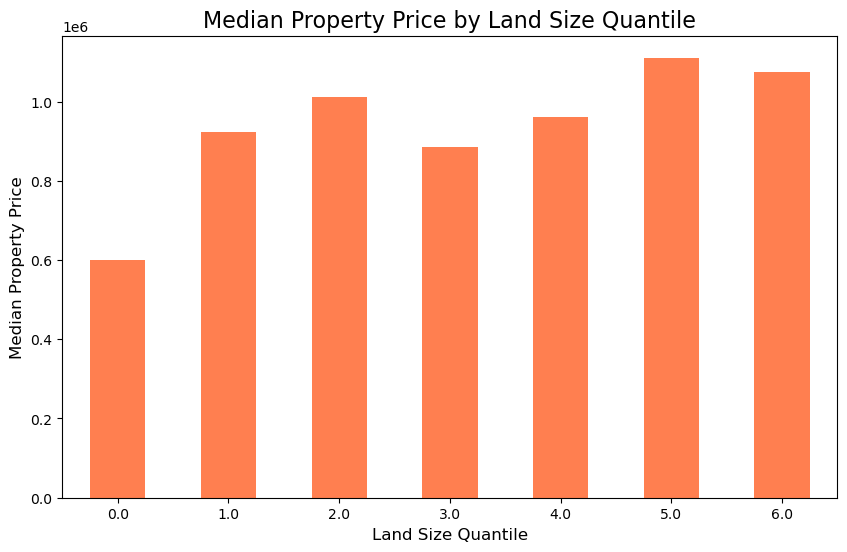

In [11]:
df['landsize_bins'] = pd.qcut(df['landsize'], q=7, labels=False)

median_price_by_bins = df.groupby('landsize_bins')['price'].median()

plt.figure(figsize=(10, 6))
median_price_by_bins.plot(kind='bar', color='coral')
plt.title('Median Property Price by Land Size Quantile', fontsize=16)
plt.xlabel('Land Size Quantile', fontsize=12)
plt.ylabel('Median Property Price', fontsize=12)
plt.xticks(rotation=0)
plt.show()

## Question 9

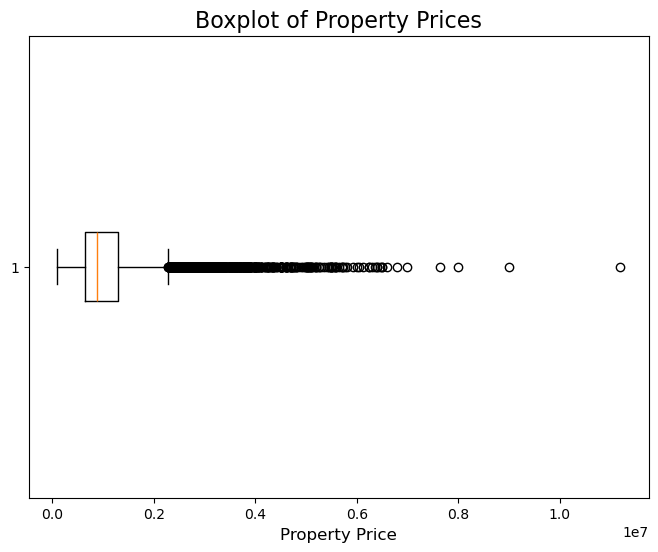

Percentage of properties identified as outliers: 3.67%


In [12]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'].dropna(), vert=False)
plt.title('Boxplot of Property Prices', fontsize=16)
plt.xlabel('Property Price', fontsize=12)
plt.show()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

percentage_outliers = (len(outliers_df) / len(df)) * 100

print(f'Percentage of properties identified as outliers: {percentage_outliers:.2f}%')

## Question 10

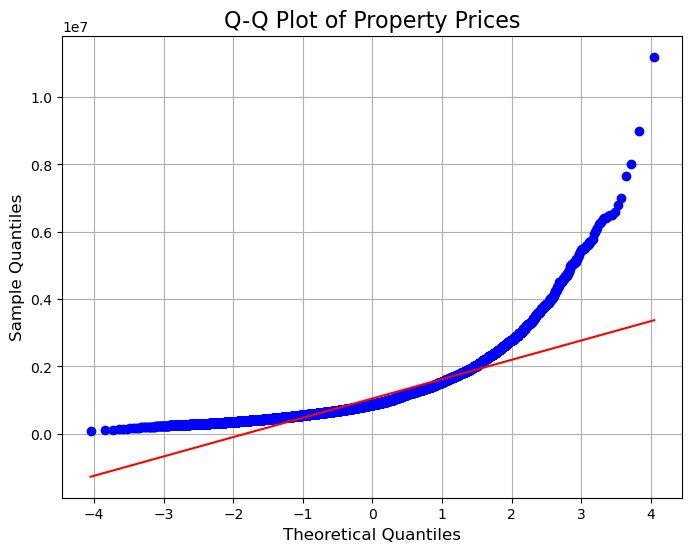

Skewness: 2.59
Kurtosis: 13.10


In [13]:
df_filtered = df['price'].dropna()

plt.figure(figsize=(8, 6))
stats.probplot(df_filtered, dist="norm", plot=plt)
plt.title('Q-Q Plot of Property Prices', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid()
plt.show()

skewness = df_filtered.skew()
kurtosis = df_filtered.kurtosis()

print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')

## Question 11

In [14]:
df_filtered = df['price'].dropna()

ks_statistic, p_value = stats.kstest(df_filtered, 'norm', args=(df_filtered.mean(), df_filtered.std()))

print(f'K-S Statistic: {ks_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print("No se rechaza la hipótesis nula: la distribución de precios puede ser normal.")
else:
    print("Se rechaza la hipótesis nula: la distribución de precios no es normal.")

K-S Statistic: 0.1375
P-Value: 0.0000
Se rechaza la hipótesis nula: la distribución de precios no es normal.


## Question 12

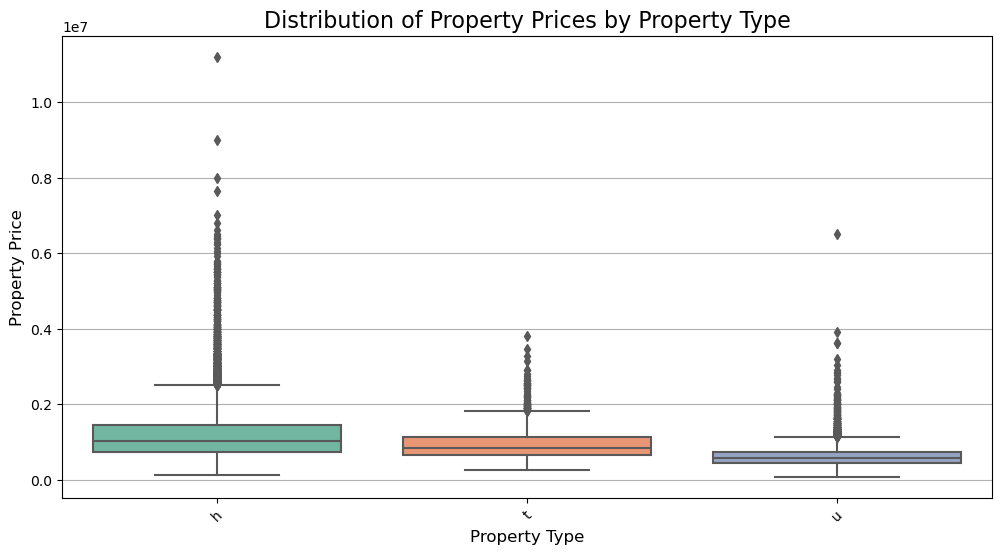

In [15]:
df_filtered = df.dropna(subset=['price', 'type'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price', data=df_filtered, palette='Set2')
plt.title('Distribution of Property Prices by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Property Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## Question 13

In [16]:
median_prices_by_region = df.groupby('regionname')['price'].median().reset_index()

highest_median_price_region = median_prices_by_region.loc[median_prices_by_region['price'].idxmax()]
lowest_median_price_region = median_prices_by_region.loc[median_prices_by_region['price'].idxmin()]

print(f'Region with the highest median price: {highest_median_price_region["regionname"]} with a median price of {highest_median_price_region["price"]:.2f}')
print(f'Region with the lowest median price: {lowest_median_price_region["regionname"]} with a median price of {lowest_median_price_region["price"]:.2f}')

Region with the highest median price: Southern Metropolitan with a median price of 1250000.00
Region with the lowest median price: Western Victoria with a median price of 412125.00


## Question 14

In [17]:

price_bins = [0, 500000, 1000000, 1500000, 2000000, np.inf]
price_labels = ['<500k', '500k-1M', '1M-1.5M', '1.5M-2M', '>2M']
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

contingency_table = pd.crosstab(df['regionname'], df['price_category'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

n = contingency_table.sum().sum()  
phi2 = chi2_stat / n
r, k = contingency_table.shape  
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

print(f'Chi-Square Statistic: {chi2_stat:.4f}')
print(f'P-Value: {p_value:.4f}')
print(f'Cramér\'s V: {cramers_v:.4f}')

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant association between region and property price categories.")
else:
    print("There is no statistically significant association between region and property price categories.")

Chi-Square Statistic: 5851.8466
P-Value: 0.0000
Cramér's V: 0.2317
There is a statistically significant association between region and property price categories.


## Question 15

In [18]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df['year'] = df['date'].dt.year

median_prices_by_year = df.groupby('year')['price'].median()

earliest_year = median_prices_by_year.index.min()
latest_year = median_prices_by_year.index.max()

median_price_earliest = median_prices_by_year.loc[earliest_year]
median_price_latest = median_prices_by_year.loc[latest_year]

percentage_change = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100

print(f'Earliest Year: {earliest_year}, Median Price: {median_price_earliest:.2f}')
print(f'Latest Year: {latest_year}, Median Price: {median_price_latest:.2f}')
print(f'Percentage Change in Median Price: {percentage_change:.2f}%')

Earliest Year: 2016, Median Price: 885000.00
Latest Year: 2018, Median Price: 836500.00
Percentage Change in Median Price: -5.48%


## Question 15

Month with the highest sales: November (4387 houses sold)


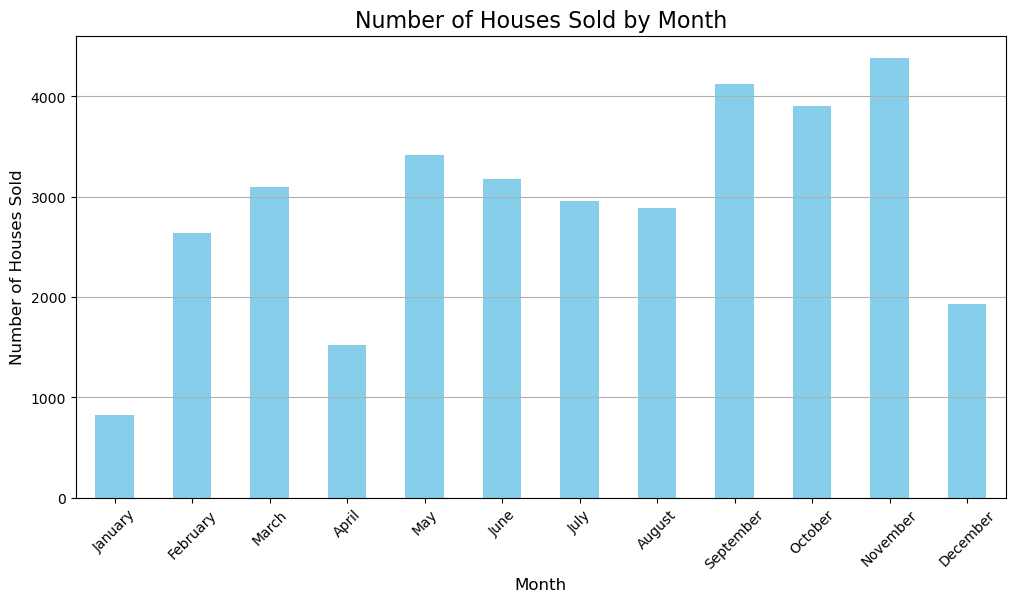

In [19]:
df['month'] = df['date'].dt.month_name()

sales_by_month = df['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

max_sales_month = sales_by_month.idxmax()
max_sales_count = sales_by_month.max()

print(f'Month with the highest sales: {max_sales_month} ({max_sales_count} houses sold)')

plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Houses Sold by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Houses Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()